<div style="font-family: 'Open Sans'; font-size: 36px; color: #006400; font-weight: bold; text-align: center; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='#006400'">
    Arch Technologies AI Internship Assignment-1
  </span>
</div>


****Name: Mudasir (AI Intern)****

****Intern ID: (ARCH-2507-2464)****

****Date: 4st July, 2025****

****Assignment submitted on: submissions.archtech@gmail.com****

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Task-1: Iris Flower Classification

  </span>
</div>


Use the Iris dataset available on Kaggle and build a machine learning model to classify iris flowers into their species based on features like petal length, petal width, sepal length, and sepal width. Your task is to preprocess the data, train the model,andevaluateitsaccuracy.

In [1]:
# Importing required libraries
# Testing 3 different models 
# 1) LogisticRegression
# 2) DecisionTreeClassifier
# 3) KNeighborsClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load dataset

df = pd.read_csv("Iris.dataset.csv")
df

In [3]:
# Preprocessing 

# 1) Check for null values
print("Null values:\n", df.isnull().sum())

Null values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
# 2) Check for duplicated rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicated rows: {duplicate_rows.shape[0]}")

Number of duplicated rows: 3


In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Check for duplicated rows again (should be 0 now)
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicated rows: {duplicate_rows.shape[0]}")

Number of duplicated rows: 0


In [8]:
# 3) Encode target column
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  
# Setosa = 0, Versicolor = 1, Virginica = 2

# Features and target
X = df.drop('species', axis=1)
y = df['species']

In [9]:
# Split data into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train 3 Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9333
Decision Tree Accuracy: 0.9667
KNN Accuracy: 0.9333


In [11]:
# Find best model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Evaluation Metrics
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Best Model: {best_model_name}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Best Model: Decision Tree
Precision: 0.9700
Recall:    0.9667
F1 Score:  0.9667


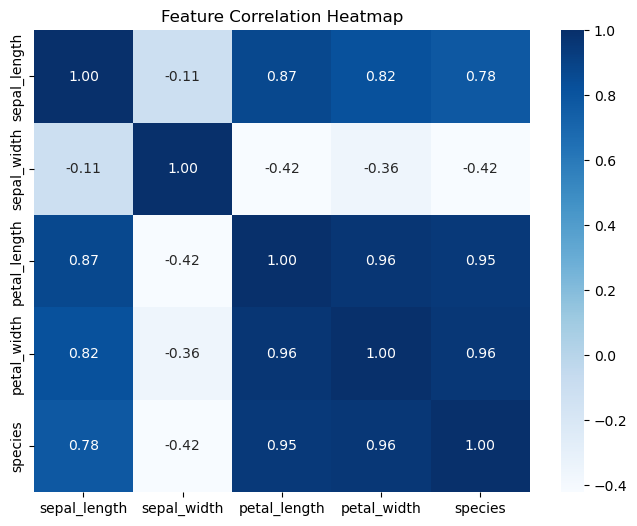

In [14]:
# 1) Heatmap (Correlation between features)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

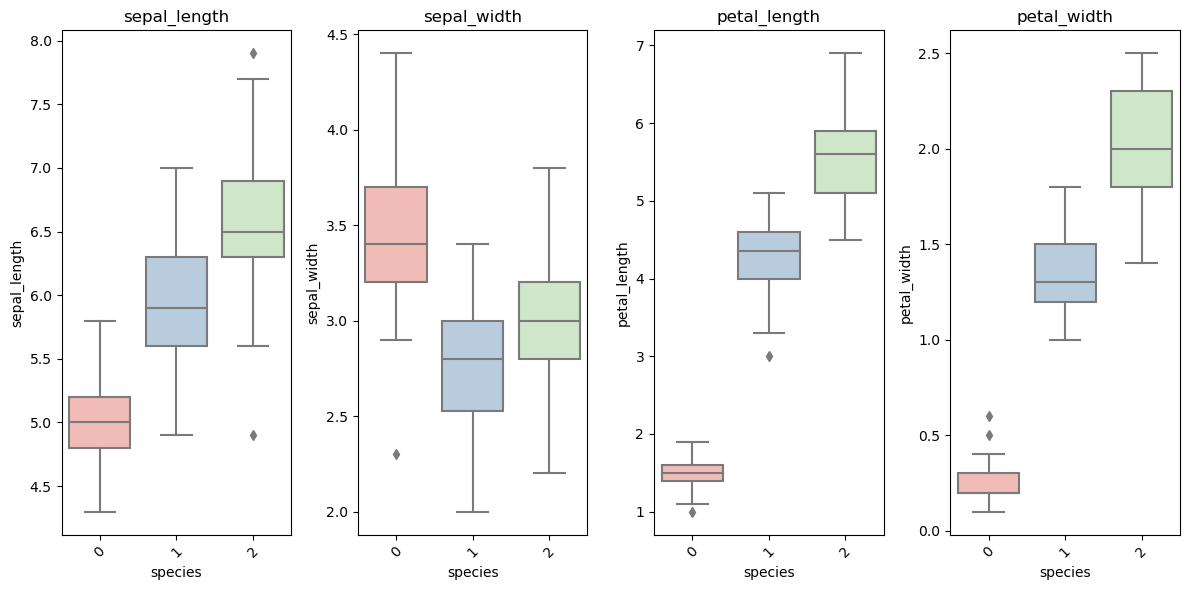

In [16]:
# 2) Boxplot (Feature distributions per species)

plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x='species', y=column, data=df, palette='Pastel1')
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

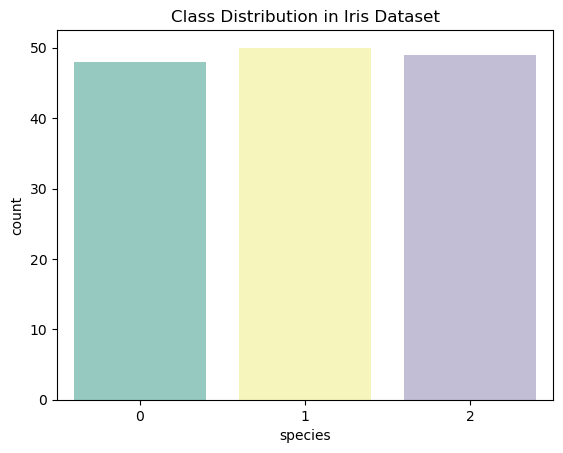

In [18]:
# 3) Countplot (Distribution of target classes)

sns.countplot(x='species', data=df, palette='Set3')
plt.title("Class Distribution in Iris Dataset")
plt.show()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Task-2: Housing Price Prediction
  </span>
</div>


Using the California housing dataset, also available on Kaggle and build a machine learning model to predict house prices based on features like location, number of rooms, and population. Your task is to clean data, select important features, train themodel,andevaluateitsaccuracy.

In [19]:
# Import all important libraries

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load the dataset
data = fetch_california_housing()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['MedHouseValue'] = data.target

# View the first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# Select only the required features [House age, rooms and location]

# House age: 'HouseAge'
# House rooms: 'AveRooms'
# House Locations: 'Latitude' and 'Longitude'

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

X = X[['HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
X['AveRooms'] = np.floor(X['AveRooms'])
X

,HouseAge,AveRooms,Latitude,Longitude
0,41.0,6.0,37.88,-122.23
1,21.0,6.0,37.86,-122.22
2,52.0,8.0,37.85,-122.24
3,52.0,5.0,37.85,-122.25
4,52.0,6.0,37.85,-122.25
...,...,...,...,...
20635,25.0,5.0,39.48,-121.09
20636,18.0,6.0,39.49,-121.21
20637,17.0,5.0,39.43,-121.22
20638,18.0,5.0,39.43,-121.32


In [22]:
# Split into train and test sets [80:20]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Linear Regression using HouseAge, AveRooms, Latitude, Longitude:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Linear Regression using HouseAge, AveRooms, Latitude, Longitude:
Mean Squared Error (MSE): 0.9219
R² Score: 0.2965


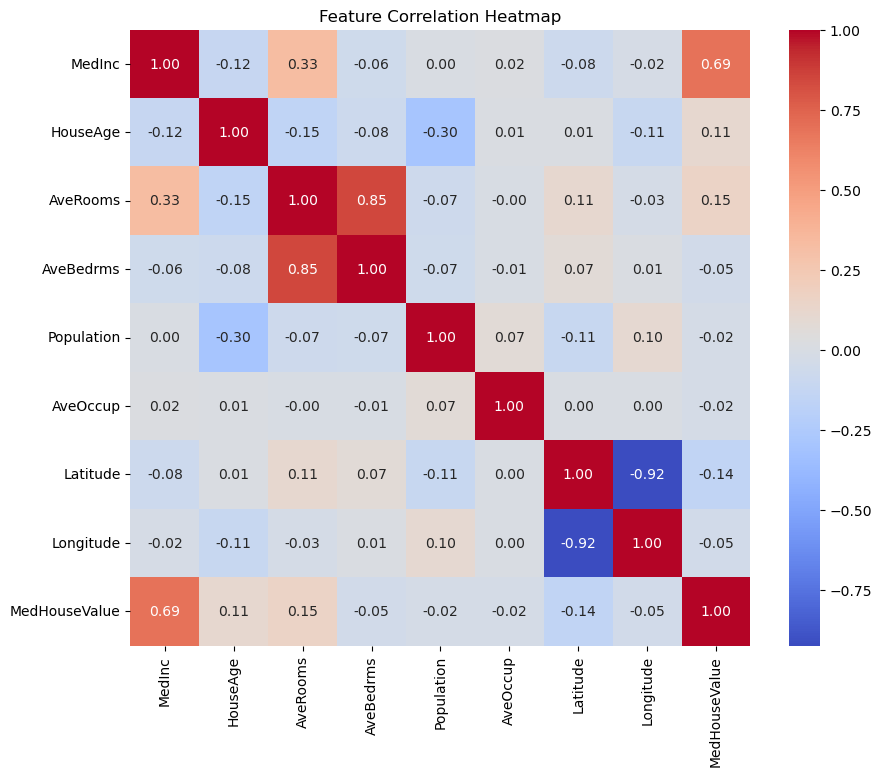

In [24]:
# Visualizations 

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

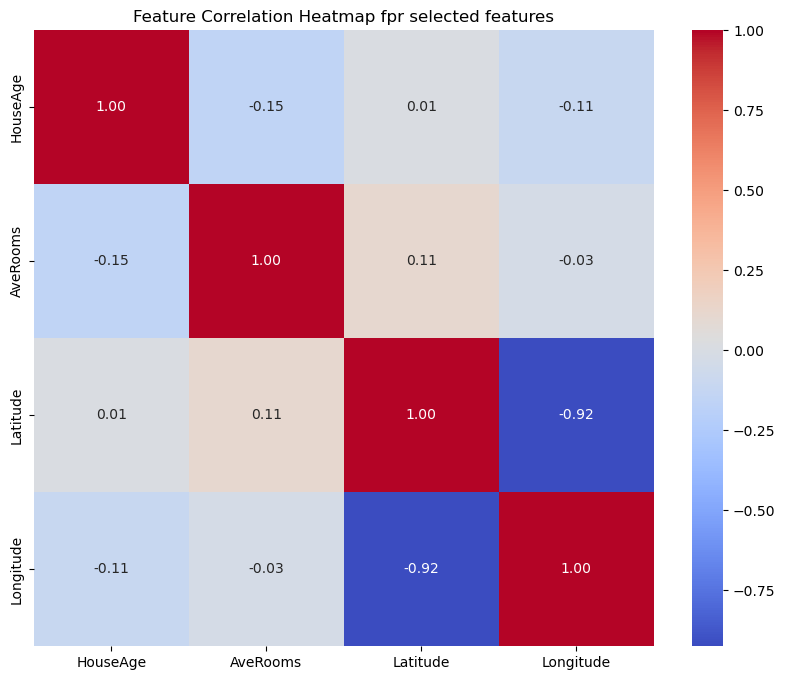

In [25]:
# 2) Correlation heatmap for selected features

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap fpr selected features")
plt.show()

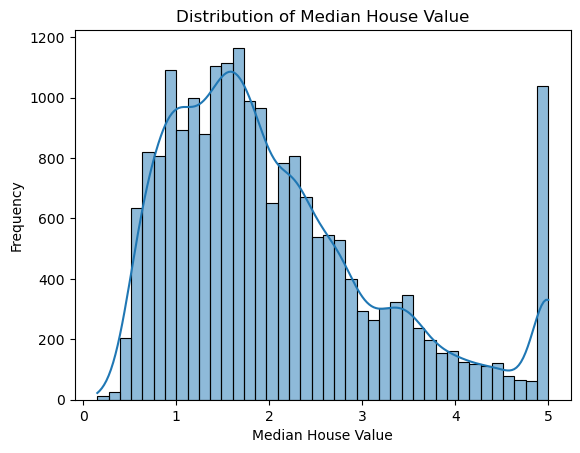

In [26]:
# 3) Distribution of Target (House Value)

sns.histplot(df['MedHouseValue'], bins=40, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

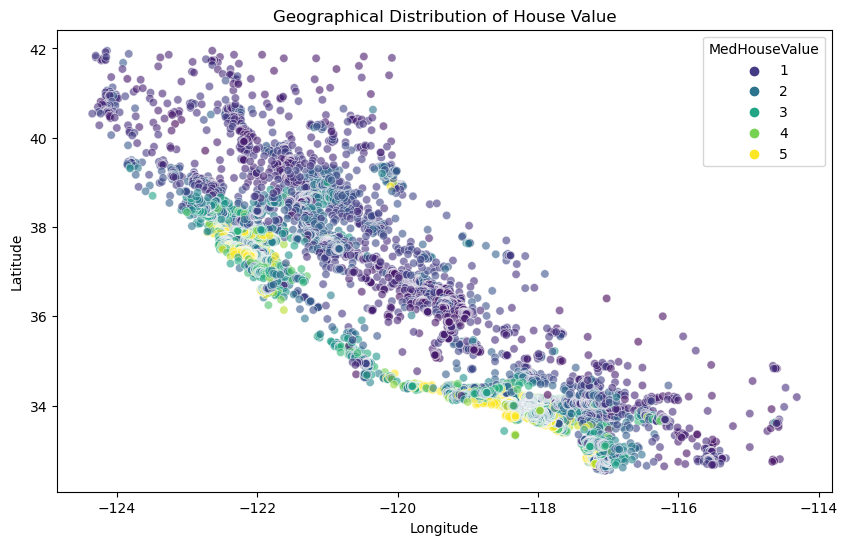

In [27]:
# 4) Geographical Distribution of House Value

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseValue', data=df, palette='viridis', alpha=0.6)
plt.title("Geographical Distribution of House Value")
plt.show()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Explanation for both tasks
  </span>
</div>


*****Task1: Iris Flower Classification – Logistic Regression, Decision Tree, and K-Nearest Neighbors*****

In this task, we used the Iris flower dataset to build a machine learning model that classifies flowers into three species—Setosa, Versicolor, and Virginica, based on features like sepal length, sepal width, petal length, and petal width. We began by preprocessing the data, checking for and confirming the absence of null values, and removing any duplicated rows to ensure data quality. The target labels (species names) were encoded into numeric form using LabelEncoder for compatibility with ML algorithms. We then split the dataset into training and testing sets to evaluate model performance.

Three different models i.e Logistic Regression, Decision Tree, and K-Nearest Neighbors were trained on the training data. Each model’s accuracy was measured on the test data, and the one with the highest accuracy was selected for further evaluation. For this best-performing model, we calculated precision, recall, and F1-score to get a more detailed understanding of its classification performance. Additionally, we used visualizations like pair plots, heatmaps, and boxplots to explore the feature relationships and class distributions, which helped in understanding the dataset better and supported effective model selection.

*****Task2: Housing Price Prediction – Linear Regression*****

In this task, the California Housing dataset was used to predict median house prices based on selected features like house age, average rooms, latitude, and longitude. The dataset was first loaded and explored, and unnecessary features were removed to focus on the relevant ones. A Linear Regression model was then trained using scikit-learn, after splitting the data into training and testing sets. The model’s performance was evaluated using Mean Squared Error (MSE) and R² Score, which indicated how well the predictions matched the actual values. Data visualization techniques like correlation heatmaps, distribution plots, and scatter plots were also used to better understand feature relationships and geographical patterns of house values. This approach demonstrated how linear models can effectively capture relationships in real estate data.

In [30]:
# Save csv file to upload and submission

from sklearn.datasets import load_iris
import pandas as pd

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['MedHouseValue'] = data.target

# Save to CSV
df.to_csv("fetch_california_housing.csv", index=False)

print("Dataset saved as 'fetch_california_housing.csv'")

Dataset saved as 'fetch_california_housing.csv'
